# **AP157 Machine Learning Lab Assignment**
## Module A1: Regression -- Overfitting, Underfitting, and Cross-Validation

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 20 and 80 points, respectively).

_Credits_: This assignment is based on Chapter 8.11 of “Statistics, Data Mining, and Machine Learning in Astronomy” (SDMMLA) by Zeljko Ivezic et al.

### Student Information

_Full Name (Last Name, First Name)_: Paul Kenneth H. Remo \
_Student No._: 2020-001185\
_Section_: TX1

### Submission Information

_Date and Time Submitted (most recent upload)_: 03/05/2024 ; 3:20PM

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: PAUL KENNETH H. REMO**

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/20
* Part 2 - []/80

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn.model_selection
import sklearn.metrics
import matplotlib.animation as animation

#### PART 1 - Generate data set *(20 points)*

1. Generate a toy data set with 100 regularly-spaced points and as described by Eq. 8.75-- a simple model where $x$ and $y$ satisfy the following:
$$ 0 \le x_i \le 3 $$
$$ y_i = x_i \sin(x_i) + \epsilon_i $$
where the noise is drawn from a normal distribution $\epsilon_i \sim \rm{N}(0, 0.1)$. *(10 points)*  

2. Plot your toy data set (Refer to Fig. 8.12 for comparison). *(10 points)*


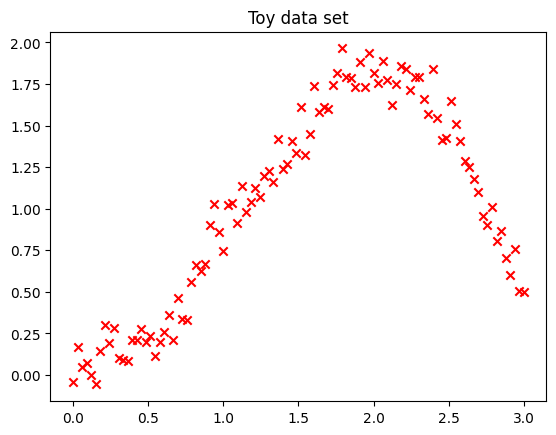

In [2]:
#We first plot the toy data set
x = np.linspace (0 , 3, 100)
y = np.zeros_like(x)
e = np.random.normal(0, 0.1, 100)
#Adding the noise function and then plotting
y = x*np.sin(x) + e
plt.scatter(x, y, color = 'red', marker = 'x')
plt.title('Toy data set')
plt.show()

This is our toy dataset with a noise of 0.1

PART 2 - Apply cross-validation *(80 points)*

Recreate the top panel of Figure 8.14: rms error vs. polynomial degree for the training set and cross-validation set. To do this, you will perform the ff. steps:

1. Split the data set into training, cross-validation, and test sets with 50%, 25% and 25% ratio. You can use sklearn library's model_selection.train_test_split function [(link)](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html). *(20 pts.)*
2. Get the best-fit curve for polynomial degrees $d=0$ to 14 for the training set. You can use numpy library's polyfit function [(link)](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). *(30 pts.)*
3. Get the rms errors for both the training and cross-validation sets (for the best-fit curve from Step 2). *(10 pts.)*
4. Plot rms errors for both the training and cross-validation sets against polynomial degree $d$ (as in Fig. 8.14). *(20 pts.)*


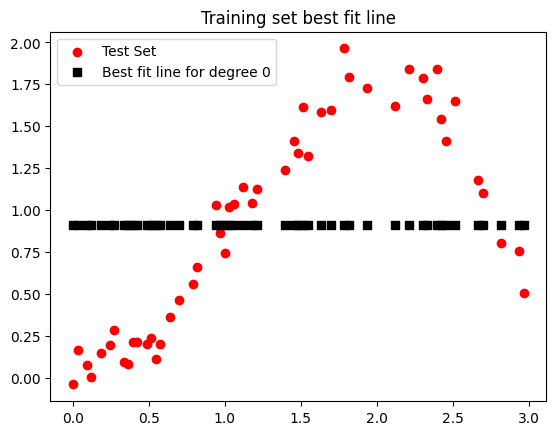

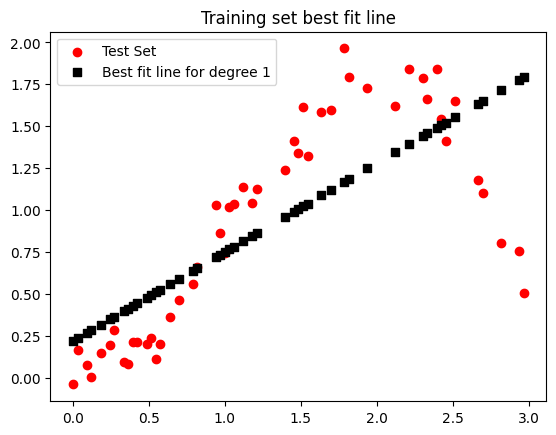

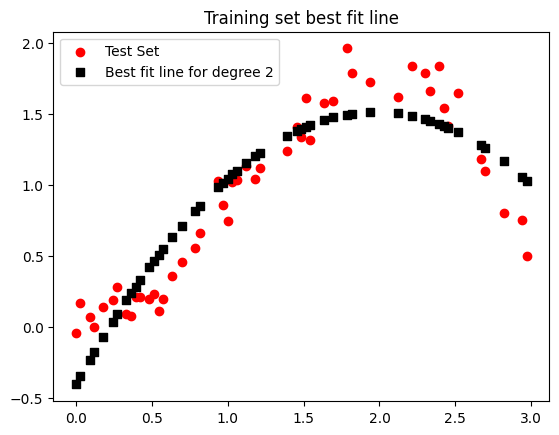

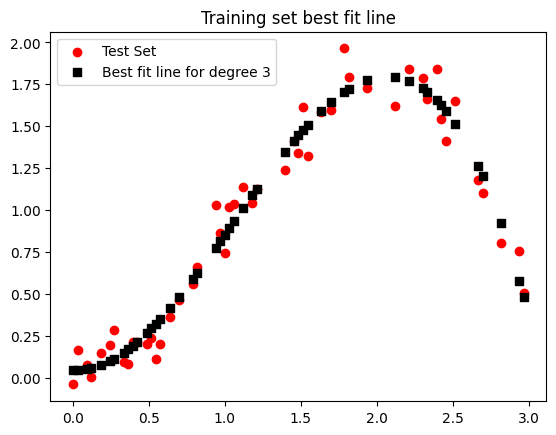

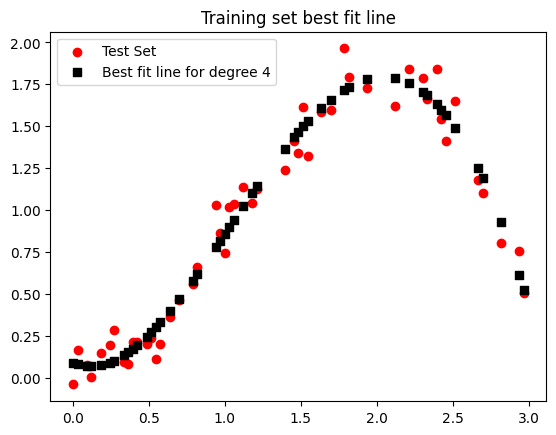

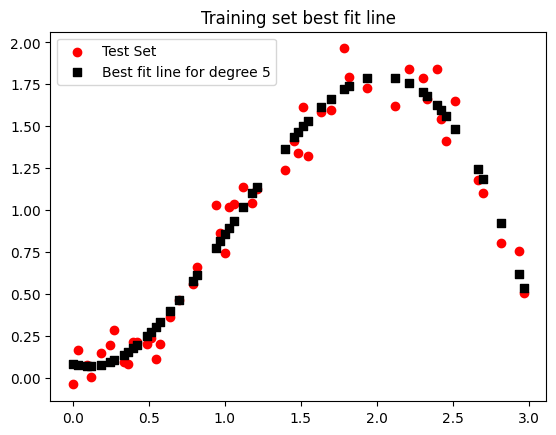

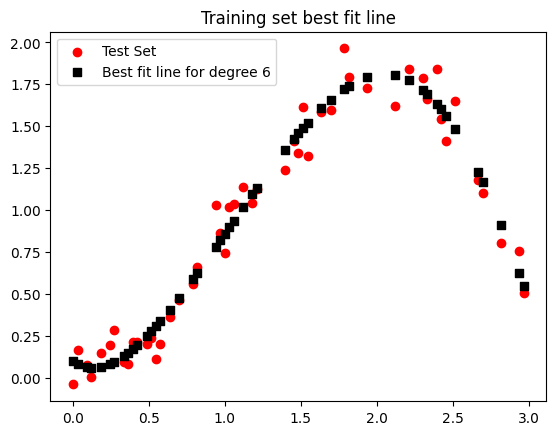

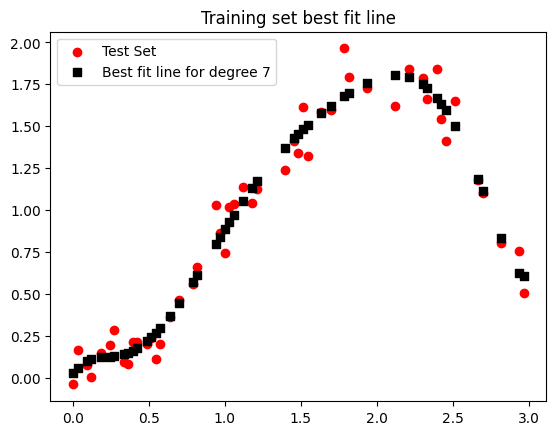

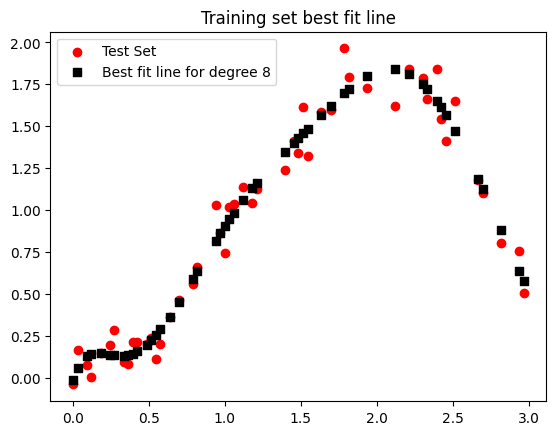

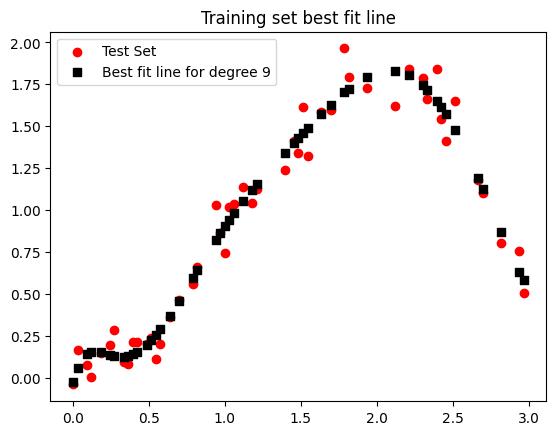

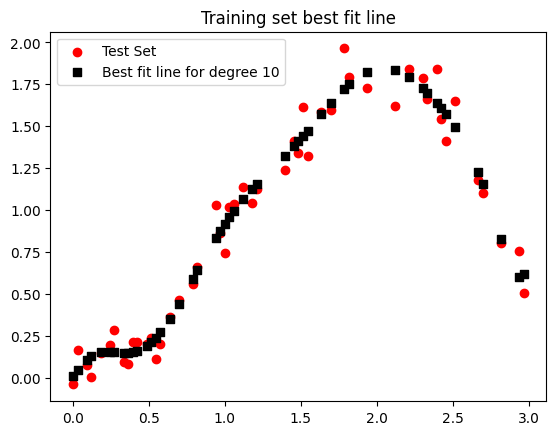

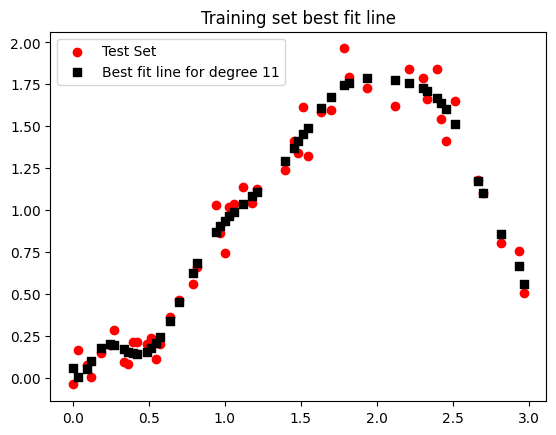

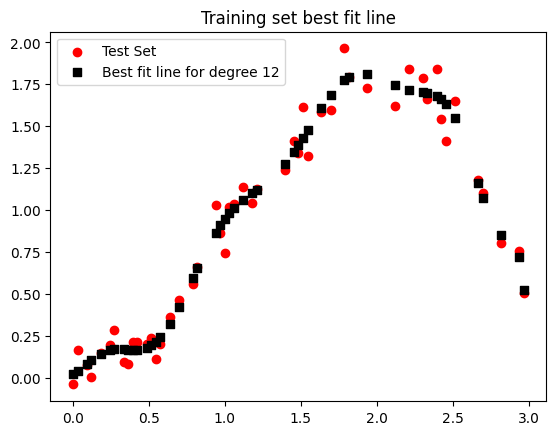

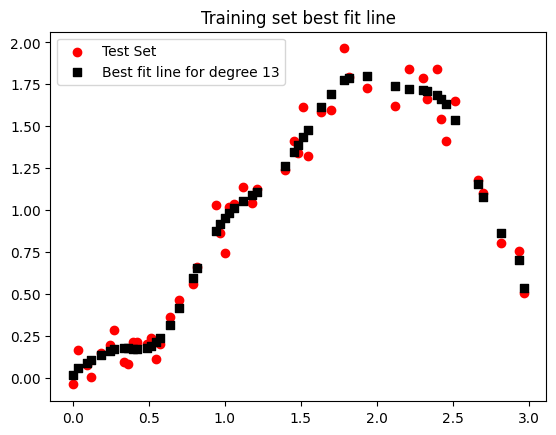

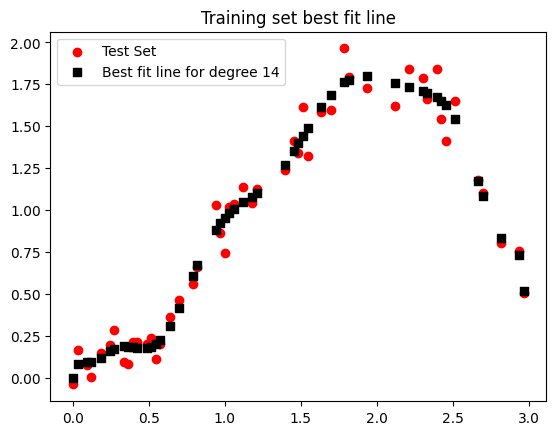

In [3]:
#Now we make the train test split for 50 training points and 50 test + CV points
xtest_cv, xtrain, ytest_cv, ytrain = sklearn.model_selection.train_test_split(x, y, test_size = 0.5, train_size = 0.5)
#Another split to be made to make 25 testing and 25 cross validation points
xtest, xcv, ytest, ycv = sklearn.model_selection.train_test_split(xtest_cv, ytest_cv, test_size = 0.5, train_size = 0.5)
#Call a blank array for the rms values
rms_train= np.zeros(15)
#For loop for both the RMS, and plotting of the best fit curves
for i in range(0, 15):
    #Making a best fit curve for each degree
    yfit = np.polyfit(xtrain, ytrain, i)
    p = np.poly1d(yfit)
    #Getting the RMS for the training data
    rms_train[i] = sklearn.metrics.root_mean_squared_error(ytrain, p(xtrain))
    #Plotting the values
    plt.scatter(xtrain, ytrain, color = 'red', label = 'Test Set')
    plt.scatter(xtrain, p(xtrain),marker = ',', color = '0', label = 'Best fit line for degree ' +  str(i))
    plt.title('Training set best fit line')
    plt.legend()
    plt.show()

In [4]:
#Now we get the RMS of the cross validation data
rms_cv = np.zeros_like(rms_train)
for i in range(0, 15):
    ycvfit = np.polyfit(xcv, p(xcv), i)
    p1 = np.poly1d(ycvfit)
    rms_cv[i] = sklearn.metrics.root_mean_squared_error(ycv, p1(xcv))
#Printing the RMS values of each
print('RMS Training', rms_train)
print('RMS CV', rms_cv)

RMS Training [0.62566147 0.41489042 0.24526244 0.11259333 0.11095449 0.11089558
 0.11053765 0.10467411 0.10259732 0.1024497  0.10055189 0.09483525
 0.09179913 0.09152804 0.09078515]
RMS CV [0.61939508 0.51462271 0.25440001 0.11720032 0.1274936  0.13188776
 0.13126448 0.13576917 0.13809413 0.13840397 0.14298027 0.13685942
 0.13883666 0.13876223 0.13874139]


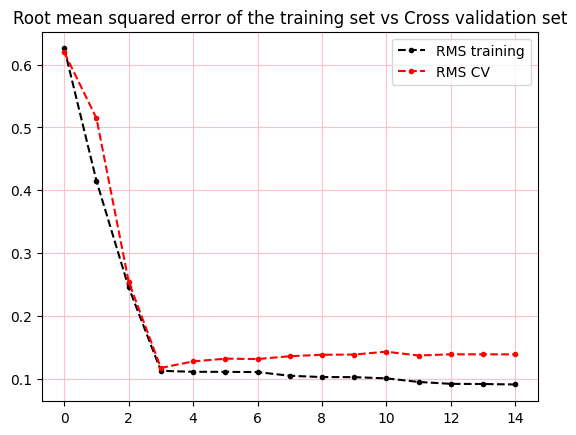

In [5]:
#Now we compare the RMS of the training and CV data by graphing them
plt.plot(rms_train, label = 'RMS training', marker = '.', linestyle = '--', color = '0')
plt.plot(rms_cv, label = 'RMS CV', marker = '.', linestyle = '--', color = 'red')
plt.title('Root mean squared error of the training set vs Cross validation set')
plt.grid(color = 'pink')
plt.legend()
plt.show()

From the given toy data set, the RMS of the cross validation set is lowest at degree 3, which means that a 3rd degree polynomial is a best fit to model the given data set. Whereas as the degree increases more than 3, the RMS increases since the curve overfits to accomodate the noise of the given data.

*Now we have fun with a different datapoint*\
We use a datapoint using $sin^{2}(x)$ with a new noise amount of 0.5

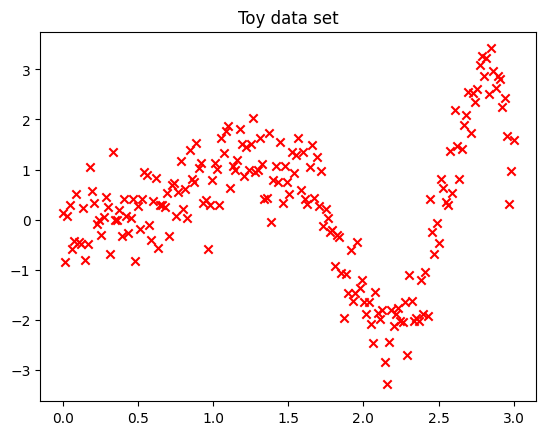

In [6]:
x1 = np.linspace (0 , 3, 200)
y1 = np.zeros_like(x)
e1 = np.random.normal(0, 0.5, 200)
y1 = x1*np.sin(x1**2) + e1
plt.scatter(x1, y1, color = 'red', marker = 'x')
plt.title('Toy data set')
plt.show()

New toy set

In [7]:
yt = np.zeros(15)
yt = y1

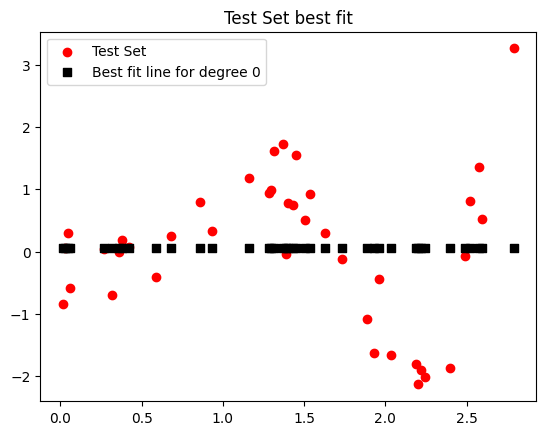

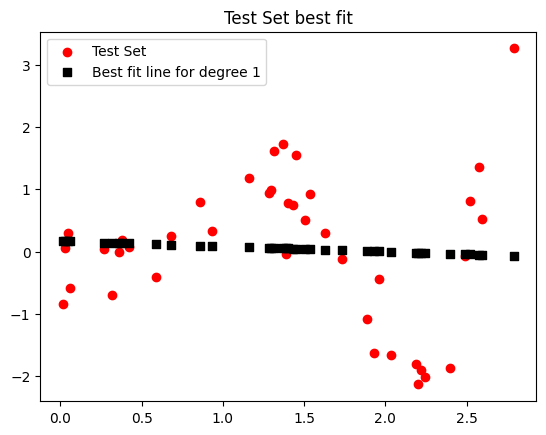

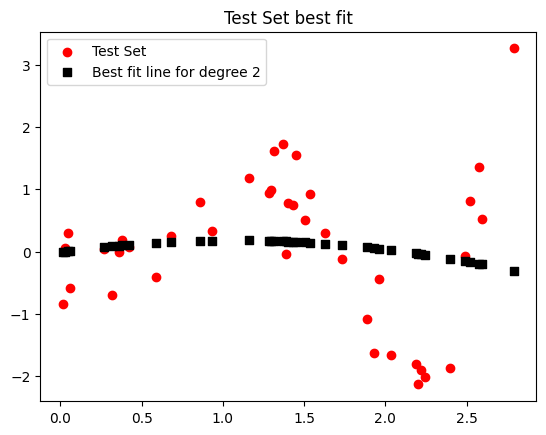

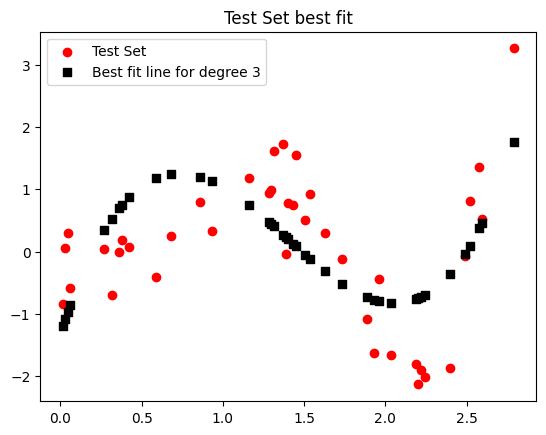

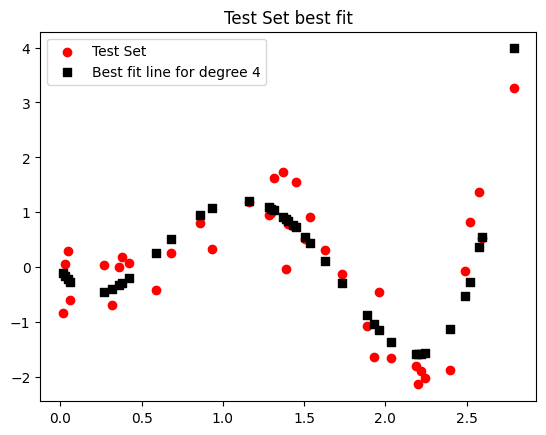

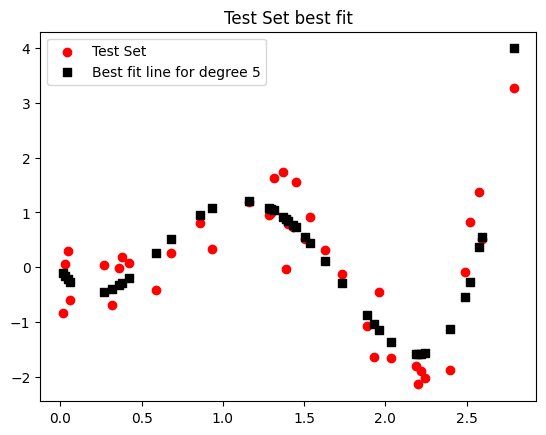

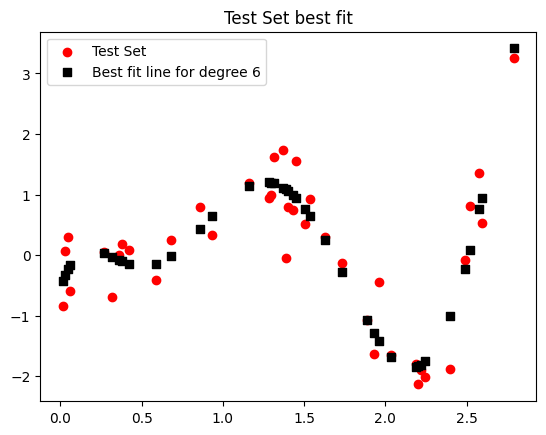

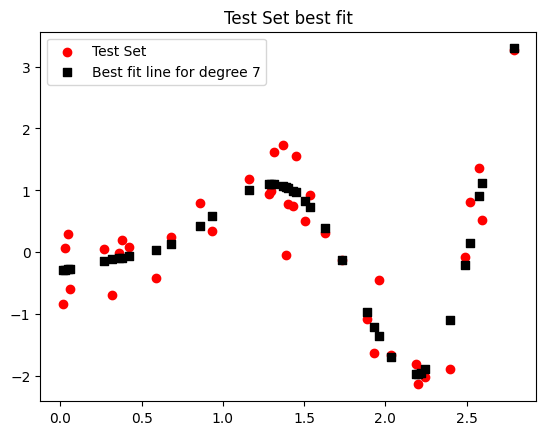

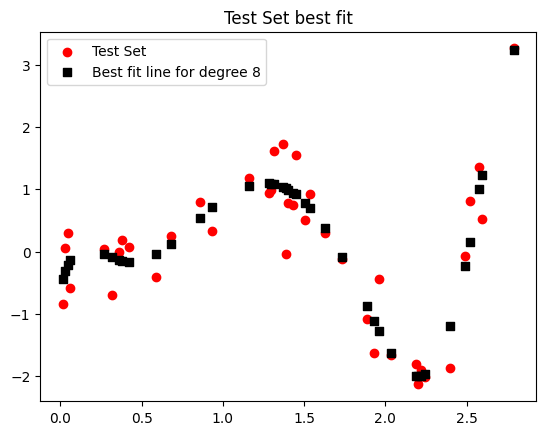

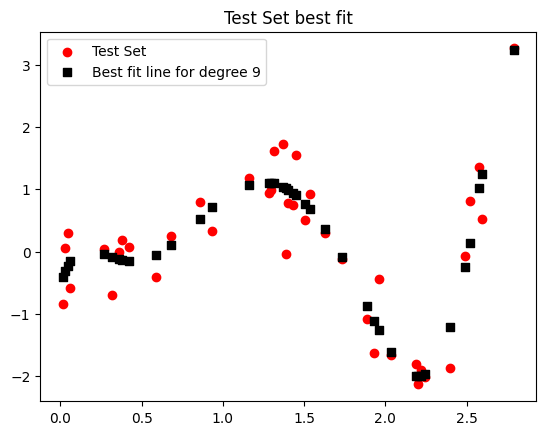

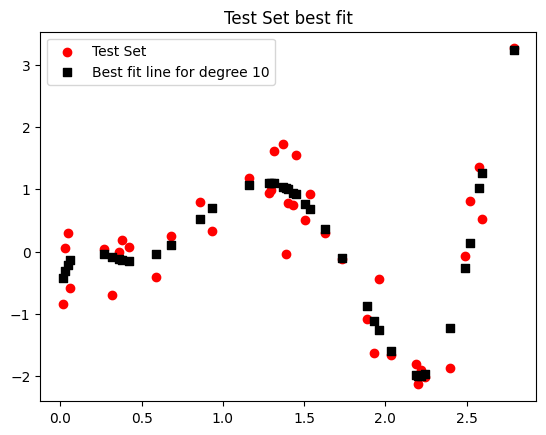

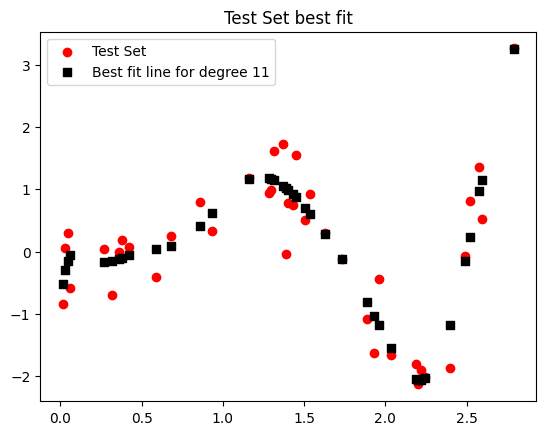

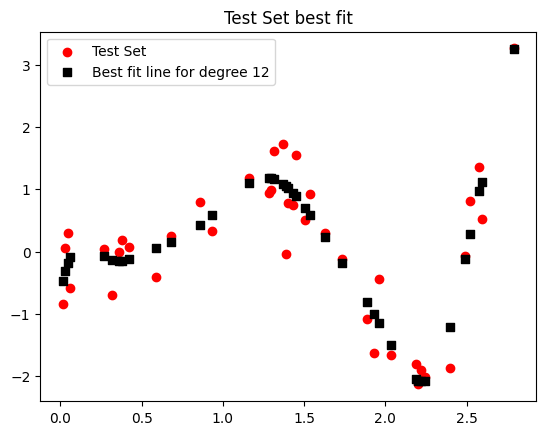

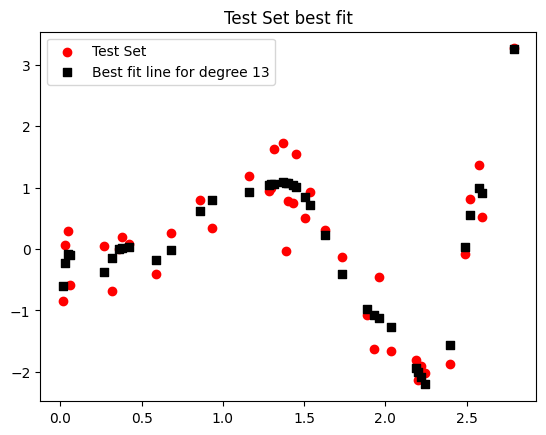

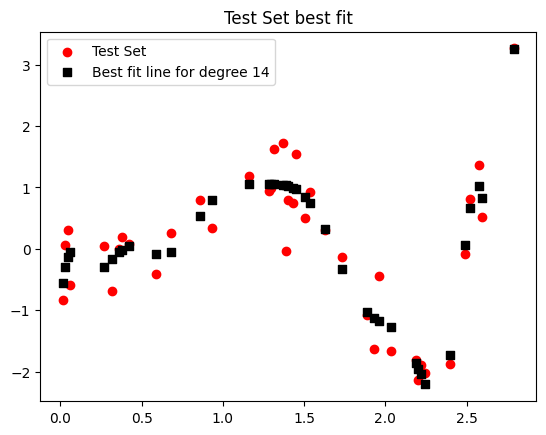

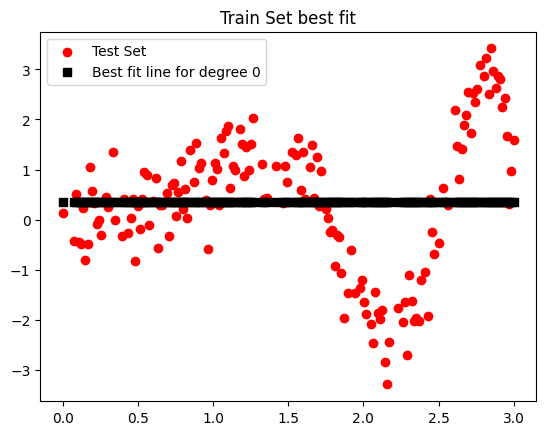

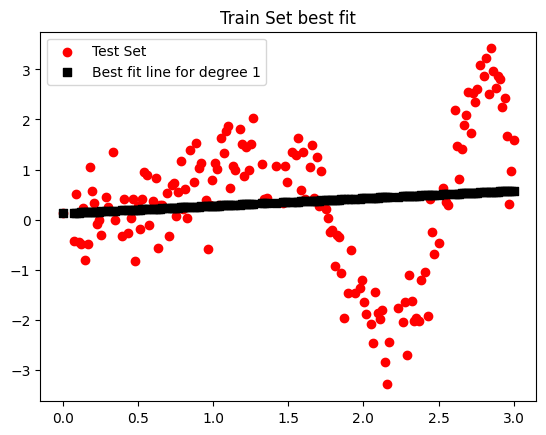

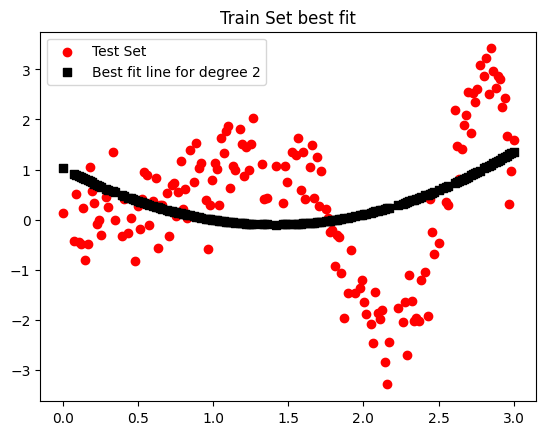

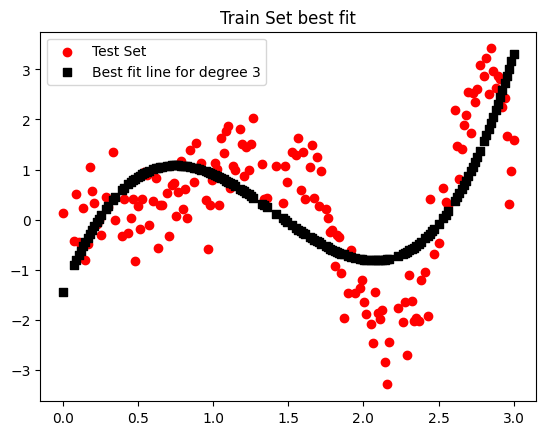

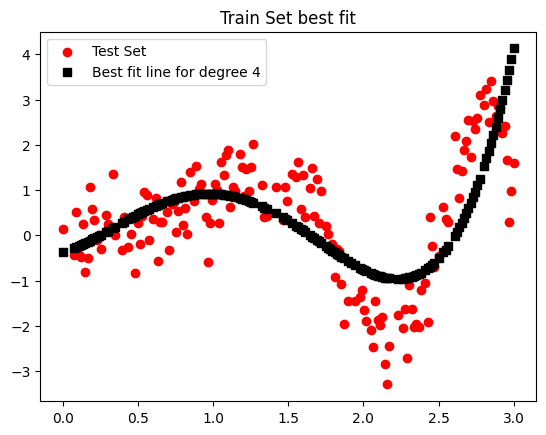

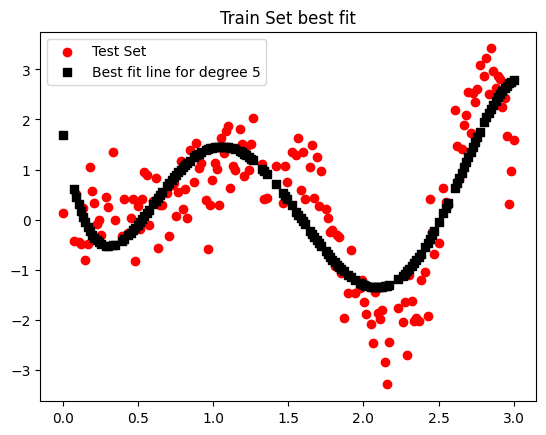

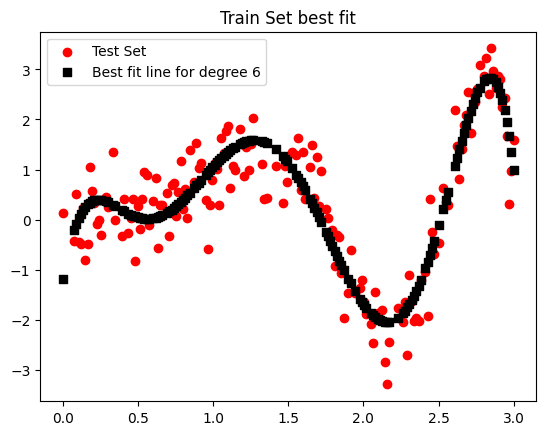

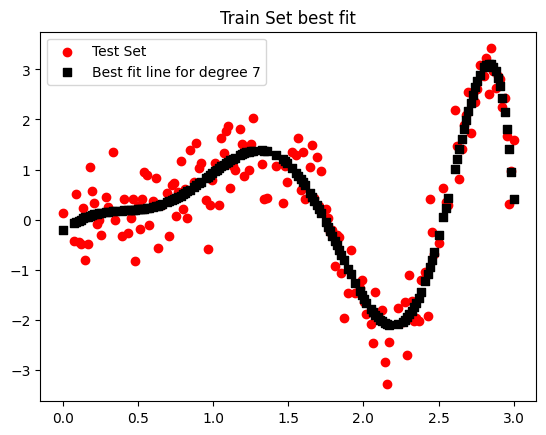

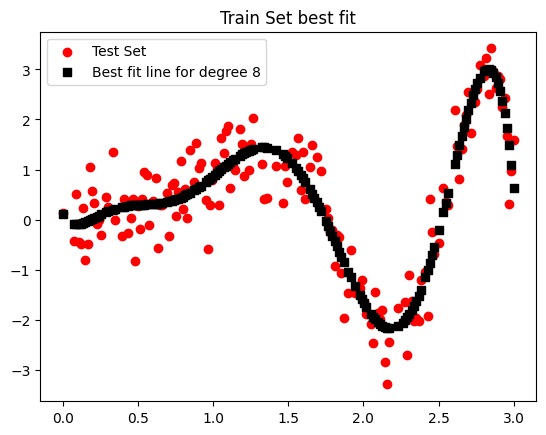

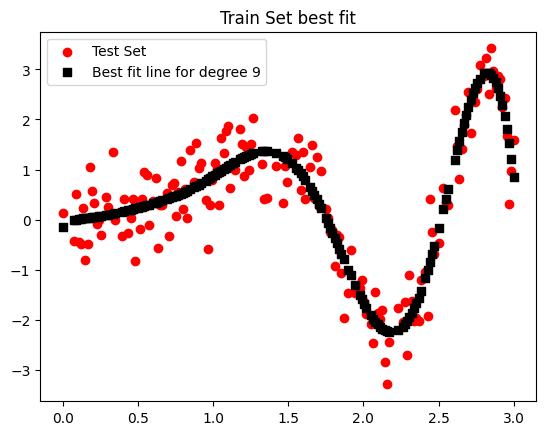

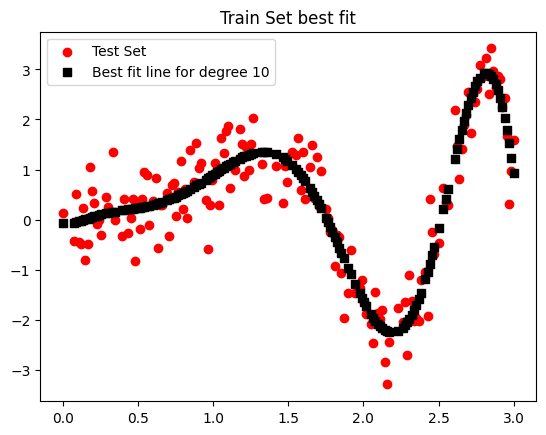

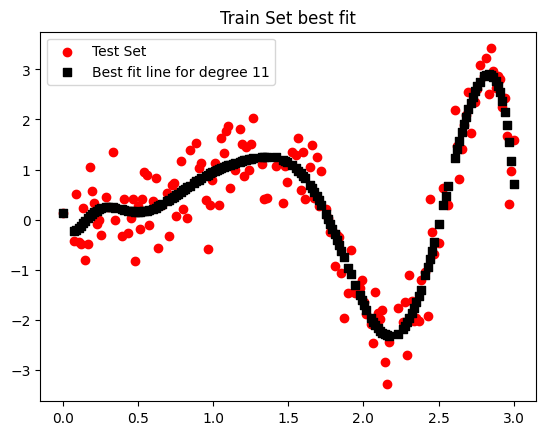

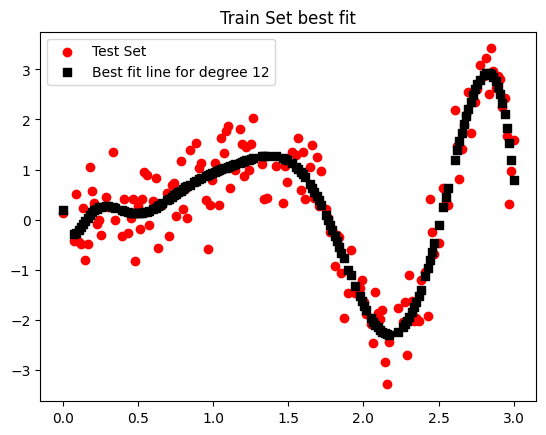

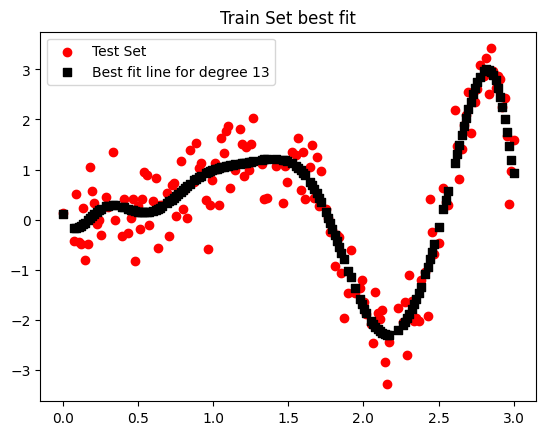

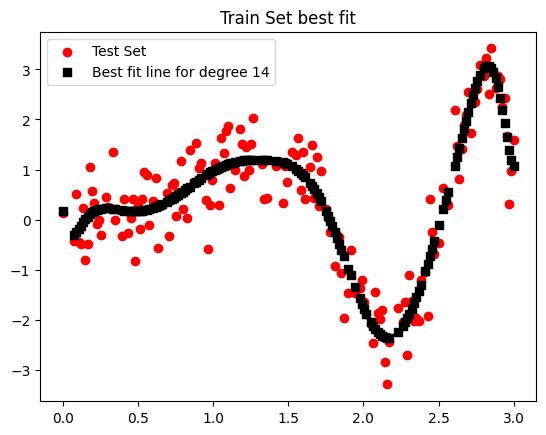

The degree with the lowest RMSE in the test set is 14 The degree with the lowest RMSE in the training set is 14


In [8]:
#Train test I didn't use cross validation this time so I just split it into 2, with a 0.3, 0.7 split
def split(x, y):
    x1test_cv, x1train, yttest_cv, yttrain = sklearn.model_selection.train_test_split(x, y, test_size = 0.2, train_size = 0.8)
    #Another split to be made to make 25 testing and 25 cross validation points
    xttest, xtcv, yttest, ytcv = sklearn.model_selection.train_test_split(x1test_cv, yttest_cv, test_size = 0.5, train_size = 0.5)
    #Call a blank array for the rms values
    return x1test_cv, x1train, yttest_cv, yttrain, xttest, xtcv, yttest, ytcv
x1test_cv, x1train, yttest_cv, yttrain, xttest, xtcv, yttest, ytcv = split(x1, yt)
#For loop for both the RMS, and plotting of the best fit curves
def bestfit(setx, sety, index, title):
    rms_ttrain = np.zeros(index)
    for i in range(index):
        #Making a best fit curve for each degree
        ytfit = np.polyfit(setx, sety, i)
        p = np.poly1d(ytfit)
        #Getting the RMS for the training data
        rms_ttrain[i] = sklearn.metrics.root_mean_squared_error(sety, p(setx))
        #Plotting the values
        test = plt.scatter(setx, sety, color = 'red', label = 'Test Set')
        best_fit = plt.scatter(setx, p(setx),marker = ',', color = '0', label = 'Best fit line for degree ' +  str(i))
        plt.title(title)
        plt.legend()
        plt.show()
    return test, best_fit, rms_ttrain
trtest, trbest_fit, trrms = bestfit(x1train, yttrain, 15, 'Test Set best fit')
tetest, tebest_fit, terms = bestfit(x1test_cv, yttest_cv, 15, 'Train Set best fit')
z1 = trrms.argmin()
z2 = terms.argmin()
print('The degree with the lowest RMSE in the test set is', z1,'The degree with the lowest RMSE in the training set is' , z2)

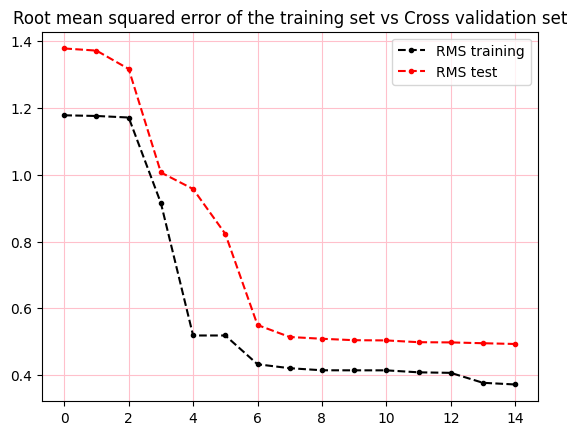

In [9]:
plt.plot(trrms, label = 'RMS training', marker = '.', linestyle = '--', color = '0')
plt.plot(terms, label = 'RMS test', marker = '.', linestyle = '--', color = 'red')
plt.title('Root mean squared error of the training set vs Cross validation set')
plt.grid(color = 'pink')
plt.legend()
plt.show()

This now shows that for this next data set, the lowest RMSE is at degree 14, but there is negligible difference in RMSE from degree 7 onwards

*Concluding the next example, our regression analysis had broken down due to the high variance of noise and increased slope of the new function*